In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Oracle Creation *task 2*

In [4]:
def f1(X):
    return X[0]**2-X[1]**2-X[0]+X[1]-1
def g1(X):
    return np.array([2*X[0]-1,-2*X[1]+1])

def oracle1(X, mode):
    if mode==1:
        return f1(X),None 
    elif mode==2:
        return f1(X),g1(X)
    elif mode==3:
        return None,g1(X)
    else:
        print('Not on the list')

In [5]:
def f2(X):
    return X[0]**2+X[1]**2+2*X[0]*X[1]
def g2(X):
    return np.array([2*X[0]+2*X[1],2*X[0]+2*X[1]])

def oracle2(X, mode):
    if mode==1:
        return f2(X),None 
    elif mode==2:
        return f2(X),g2(X)
    elif mode==3:
        return None,g2(X)
    else:
        print('Not on the list')

In [6]:
def f3(X):
    return X[0]**2+X[1]**2-2*X[0]*X[1]
def g3(X):
    return np.array([2*X[0]-2*X[1],2*X[1]-2*X[0]])

def oracle3(X, mode):
    if mode==1:
        return f3(X),None 
    elif mode==2:
        return f3(X),g3(X)
    elif mode==3:
        return None,g3(X)
    else:
        print('Not on the list')        

In [7]:
def f6(X):
    return 0.5*np.linalg.norm(X)**2
def g6(X):
    return X

def oracle6(X, mode):
    if mode==1:
        return f6(X),None 
    elif mode==2:
        return f6(X),g6(X)
    elif mode==3:
        return None,g6(X)
    else:
        print('Not on the list')  

# Gradient method implementation *task 3*

In [8]:
def algorithm(x0,oracle, tol = 10e-6, MaxIt=1000, step=0.5):
    k=0
    X =  [x0] 
    while True:
        f, g = oracle(X[-1], mode=2)
        if np.linalg.norm(g)<tol:
            print (f'Converged on {X[-1]}')
            return X[-1],X
        else:
            X.append(X[-1]-step*g)
            if k<MaxIt:
                k+=1
            else:
                print('Max iterations')
                return None,X

In [25]:
x_opt2,x2 = algorithm(np.array([0.5,0.5]),oracle2)

Max iterations


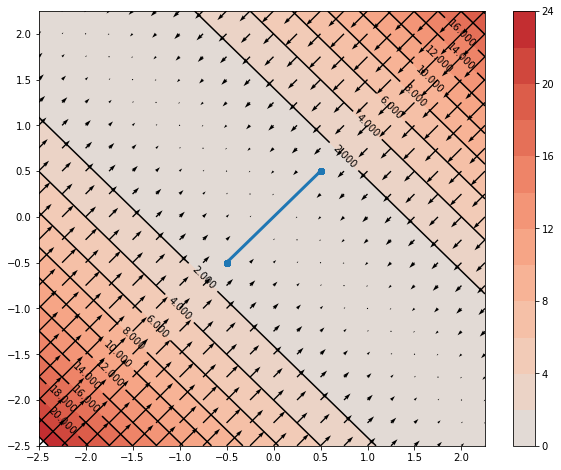

In [26]:
delta = 0.25
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2 + 2*X*Y

dX = 2*X + 2*Y
dY = 2*Y + 2*X

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
levels = np.arange(Z.min(),Z.max(),2)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
CS2 = ax.contour(X, Y, Z, levels=levels, norm=norm, colors='k')
fig.colorbar(CS, ax=ax)
ax.clabel(CS2, inline=1, fontsize=10)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ticksx = plt.xticks(np.arange(min(x),max(x), 0.5))
ticksy = plt.yticks(np.arange(min(x), max(x), 0.5))

q = ax.quiver(x, y, -dX, -dY)

Xk1 = [x2[k][0] for k in range(len(x2))]
Xk2 = [x2[k][1] for k in range(len(x2))] 

tray  = ax.plot(Xk1, Xk2, linewidth=3, marker='o')

In [11]:
x_opt3,x3 = algorithm(np.array([1,1]),oracle3)

Converged on [1 1]


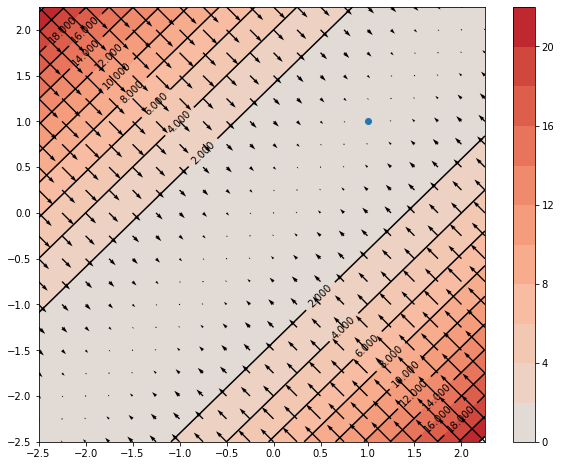

In [12]:
delta = 0.25
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2 - 2*X*Y

dX = 2*X - 2*Y
dY = 2*Y - 2*X

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
levels = np.arange(Z.min(),Z.max(),2)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
CS2 = ax.contour(X, Y, Z, levels=levels, norm=norm, colors='k')
fig.colorbar(CS, ax=ax)
ax.clabel(CS2, inline=1, fontsize=10)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ticksx = plt.xticks(np.arange(min(x),max(x), 0.5))
ticksy = plt.yticks(np.arange(min(x), max(x), 0.5))

q = ax.quiver(x, y, -dX, -dY)

Xk1 = [x3[k][0] for k in range(len(x3))]
Xk2 = [x3[k][1] for k in range(len(x3))] 

tray  = ax.plot(Xk1, Xk2, linewidth=1, marker='o')

In [13]:
x_opt6,x6 = algorithm(np.array([1,1]),oracle6)

Converged on [3.81469727e-06 3.81469727e-06]


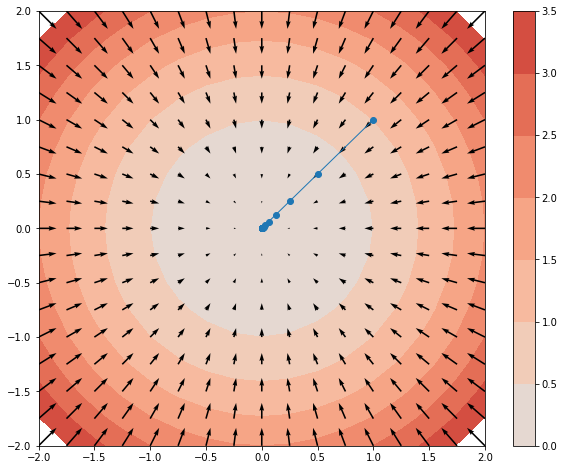

In [14]:
delta = 0.25
x = np.arange(-2, 2.1, delta)
y = np.arange(-2, 2.1, delta)
X, Y = np.meshgrid(x, y)
Z = 0.5*(X**2+Y**2)

dX = X
dY = Y

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
levels = np.arange(round(Z.min()),round(Z.max()),0.5)

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
fig.colorbar(CS, ax=ax)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

Xk1 = [x6[k][0] for k in range(len(x6))]
Xk2 = [x6[k][1] for k in range(len(x6))] 

q = ax.quiver(x, y, -dX, -dY)

tray  = ax.plot(Xk1, Xk2, linewidth=1, marker='o')

In [15]:
x_opt6_10,x6_10 = algorithm(np.ones(10),oracle6)

Converged on [1.90734863e-06 1.90734863e-06 1.90734863e-06 1.90734863e-06
 1.90734863e-06 1.90734863e-06 1.90734863e-06 1.90734863e-06
 1.90734863e-06 1.90734863e-06]


In [16]:
x_opt6_1000,x6_1000 = algorithm(np.ones(10000),oracle6)

Converged on [5.96046448e-08 5.96046448e-08 5.96046448e-08 ... 5.96046448e-08
 5.96046448e-08 5.96046448e-08]


In [35]:
def Armijo(X,d,oracle,MaxItLineSearch,t0 = 100, theta=0.2, m=0.001):
    p=0
    t = [t0]
    while True:
        f, g = oracle(X, mode=2)
        
        f1, g1 = oracle(X+t[-1]*d, mode=1)
        
        if f1 <= f + m*t[-1]*np.dot(g,d):
            return t[-1]
        else:
            t.append(theta*t[-1])
            if p<MaxItLineSearch:
                p+=1
            else:
                print(f'Max iterations \n\t direction: {d} \n\t step:{t[-1]}')
                raise ValueError('Max iteration')

            
def algorithme2(x0,oracle, MaxIt=1000,tol = 10e-6, MaxItLineSearch=50, step = 100):
    k=0
    X =  [x0] 
    while True:
        f, g = oracle(X[-1], mode=2)
        if np.linalg.norm(g)<tol:
            print (f'Converged on {X[-1]}')
            return X[-1],X
        else:
            d = -g
            try:
                step = Armijo(X[-1],d, oracle, MaxItLineSearch=MaxItLineSearch, t0 = 100)
            except ValueError:
                print('Max armijo line search iterations')
                return None,X                                
            X.append(X[-1] + step*d)
            if k<MaxIt:
                k+=1
            else:
                print('Max iterations')
                return None,X
            

In [21]:
x_opt2,x2 = algorithme2(np.array([1,1]),oracle2)

Converged on [1.70581728e-06 1.70581728e-06]


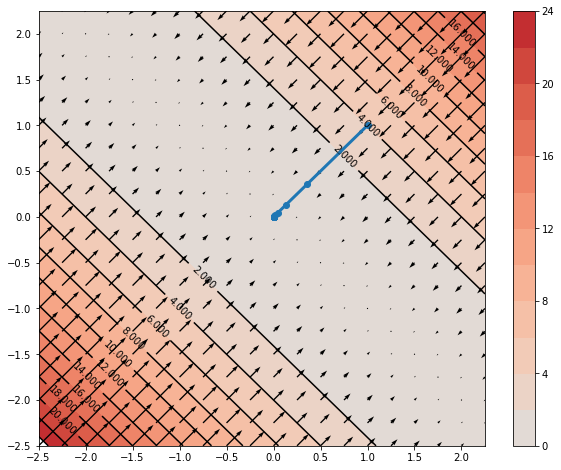

In [22]:
delta = 0.25
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2 + 2*X*Y

dX = 2*X + 2*Y
dY = 2*Y + 2*X

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
levels = np.arange(Z.min(),Z.max(),2)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
CS2 = ax.contour(X, Y, Z, levels=levels, norm=norm, colors='k')
fig.colorbar(CS, ax=ax)
ax.clabel(CS2, inline=1, fontsize=10)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ticksx = plt.xticks(np.arange(min(x),max(x), 0.5))
ticksy = plt.yticks(np.arange(min(x), max(x), 0.5))

q = ax.quiver(x, y, -dX, -dY)

Xk1 = [x2[k][0] for k in range(len(x2))]
Xk2 = [x2[k][1] for k in range(len(x2))] 

tray  = ax.plot(Xk1, Xk2, linewidth=3, marker='o')

In [23]:
x_opt3,x3 = algorithme2(np.array([1,1]),oracle3)

Converged on [1 1]


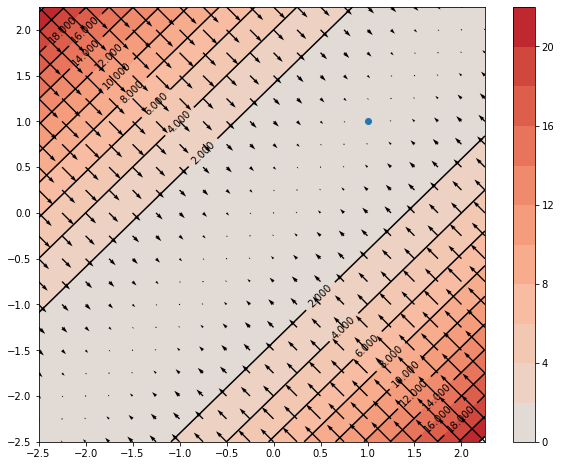

In [24]:
delta = 0.25
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.5, 2.5, delta)
X, Y = np.meshgrid(x, y)

Z = X**2 + Y**2 - 2*X*Y

dX = 2*X - 2*Y
dY = 2*Y - 2*X

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
levels = np.arange(Z.min(),Z.max(),2)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
CS2 = ax.contour(X, Y, Z, levels=levels, norm=norm, colors='k')
fig.colorbar(CS, ax=ax)
ax.clabel(CS2, inline=1, fontsize=10)
ax.set_xlim([min(x), max(x)])
ax.set_ylim([min(y), max(y)])
ticksx = plt.xticks(np.arange(min(x),max(x), 0.5))
ticksy = plt.yticks(np.arange(min(x), max(x), 0.5))

q = ax.quiver(x, y, -dX, -dY)

Xk1 = [x3[k][0] for k in range(len(x3))]
Xk2 = [x3[k][1] for k in range(len(x3))] 

tray  = ax.plot(Xk1, Xk2, linewidth=1, marker='o')

In [28]:
x_opt6,x6 = algorithme2(np.array([1,1]),oracle6)

Converged on [2.56e-06 2.56e-06]


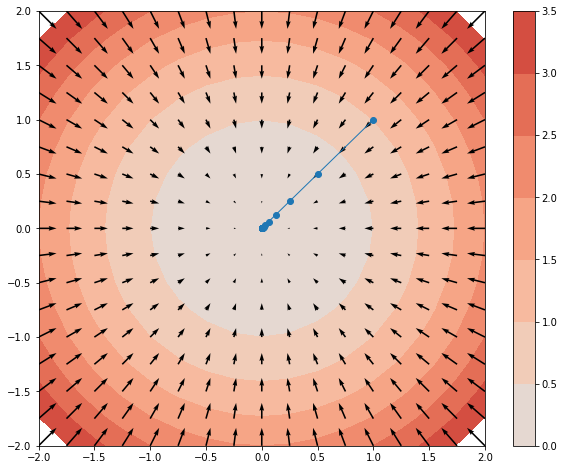

In [26]:
delta = 0.25
x = np.arange(-2, 2.1, delta)
y = np.arange(-2, 2.1, delta)
X, Y = np.meshgrid(x, y)
Z = 0.5*(X**2+Y**2)

dX = X
dY = Y

fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
levels = np.arange(round(Z.min()),round(Z.max()),0.5)

CS = ax.contourf(X, Y, Z, levels=levels, norm=norm, cmap=cm.coolwarm)
fig.colorbar(CS, ax=ax)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

Xk1 = [x6[k][0] for k in range(len(x6))]
Xk2 = [x6[k][1] for k in range(len(x6))] 

q = ax.quiver(x, y, -dX, -dY)

tray  = ax.plot(Xk1, Xk2, linewidth=1, marker='o')

In [30]:
def f7(X):
    F = np.copy(X)
    return sum([(i+1)*X[i]**2+10*X[i]**4 for i in range(len(F))])
def g7(X):
    G = np.copy(X)
    for i in range(len(G)):
        G[i]=2*(i+1)*X[i]+40*X[i]**3
    return G

def oracle7(X, mode):
    if mode==1:
        return f7(X),None 
    elif mode==2:
        return f7(X),g7(X)
    elif mode==3:
        return None,g7(X)
    else:
        print('Not on the list')

In [38]:
z=10*np.ones(10)
z[-1]=-10
x_opt7,x7 = algorithme2(z,oracle7, MaxIt=10000, MaxItLineSearch=50)    

Converged on [-2.05090137e-06 -7.60084583e-14  2.92708597e-36  3.24936591e-18
  5.66530051e-12  3.78545095e-09  9.39297114e-08  3.08151552e-07
  2.11224831e-07 -3.37850333e-08]
